In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling NaNs

In [ ]:
df = pd.read_excel('predictores_nd.xlsx')
df.head()

,ID,SEXO,EDAD,PERTENENCIA_ETNICA,gp_desplaz,gp_migrant,gp_indigen,LOC_RES,REGIMEN_AFILIACION,TIPO_TB,CONDICION_INGRESO,RESULTADO_BK_RECOD,CONDICION_VIH,Consumidor_SPA,Desnutricion,Tabaquismo,Enf_Mental,PERDIDA_SEGUIMIENTO
0,1,M,25,OTRO,NO,NO,NO,FDB,P,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO
1,2,M,66,OTRO,NO,NO,NO,SO,S,PULMONAR,OPT,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO
2,3,M,38,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,SI,NO,NO,NO
3,4,M,67,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,SI,NO,NO
4,5,F,25,OTRO,NO,NO,NO,SO,S,PULMONAR,NUEVO,POSITIVO,NEGATIVO,NO,NO,NO,NO,NO


In [ ]:
print(df.columns)

Index(['ID', 'SEXO', 'EDAD', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant',
       'gp_indigen', 'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB',
       'CONDICION_INGRESO', 'RESULTADO_BK_RECOD', 'CONDICION_VIH',
       'Consumidor_SPA', 'Desnutricion', 'Tabaquismo', 'Enf_Mental',
       'PERDIDA_SEGUIMIENTO'],
      dtype='object')


In [ ]:
categoric_columns = ['SEXO', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant', 'gp_indigen', 'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB', 'CONDICION_INGRESO', 'RESULTADO_BK_RECOD','CONDICION_VIH', 'Consumidor_SPA','Desnutricion', 'Tabaquismo', 'Enf_Mental']
columns = list(df.columns)
numeric_columns = [i for i in columns if i not in categoric_columns]

In [ ]:
df['PERDIDA_SEGUIMIENTO'] = df['PERDIDA_SEGUIMIENTO'].map({'NO': 0, 'SI': 1})
df = pd.DataFrame(df)

In [ ]:
numeric_columns.remove('ID')

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
encoder = ce.BinaryEncoder(drop_invariant=False, return_df=True) # Use ce.BinaryEncoder
encoder.fit(df[categoric_columns])

BinaryEncoder(cols=['SEXO', 'PERTENENCIA_ETNICA', 'gp_desplaz', 'gp_migrant',
                    'gp_indigen', 'LOC_RES', 'REGIMEN_AFILIACION', 'TIPO_TB',
                    'CONDICION_INGRESO', 'RESULTADO_BK_RECOD', 'CONDICION_VIH',
                    'Consumidor_SPA', 'Desnutricion', 'Tabaquismo',
                    'Enf_Mental'],
              mapping=[{'col': 'SEXO',
                        'mapping':     SEXO_0  SEXO_1
 1       0       1
 2       1       0
-1       0       0
-2       0       0},
                       {'col': 'PERTENENCIA_ETNICA',
                        'mapping':     PERTENE...
                        'mapping':     CONDICION_VIH_0  CONDICION_VIH_1
 1                0                1
 2                1                0
 3                1                1
-1                0                0
-2                0                0},
                       {'col': 'Consumidor_SPA',
                        'mapping':     Consumidor_SPA_0  Consumidor_SPA_1
 1                 0                 1
 2                 1                 0
-1                 0                 0
-2                 0                 0},
                       {'col': 'Desnutricion',
                        'mapping':     Desnutricion_0  Desnutricion_1
 1               0               1
 2               1               0
-1               0               0
-2               0               0},
                       {'col': 'Tabaquismo',
                        'mapping':     Tabaquismo_0  Tabaquismo_1
 1             0             1
 2             1             0
-1             0             0
-2             0             0},
                       {'col': 'Enf_Mental',
                        'mapping':     Enf_Mental_0  Enf_Mental_1
 1             0             1
 2             1             0
-1             0             0
-2             0             0}])

In [ ]:
from tabulate import tabulate
#print(tabulate(encoder.head(), headers='keys', tablefmt='psql'))
encoded_data = encoder.transform(df[categoric_columns])
print(tabulate(encoded_data.head(), headers='keys', tablefmt='psql'))
#LOC_RES_encoded = encoder.transform(df[categoric_columns])
#LOC_RES_encoded

+----+----------+----------+------------------------+------------------------+------------------------+----------------+----------------+----------------+----------------+----------------+----------------+-------------+-------------+-------------+------------------------+------------------------+------------------------+-------------+-------------+-----------------------+-----------------------+-----------------------+------------------------+------------------------+------------------------+-------------------+-------------------+--------------------+--------------------+------------------+------------------+----------------+----------------+----------------+----------------+
|    |   SEXO_0 |   SEXO_1 |   PERTENENCIA_ETNICA_0 |   PERTENENCIA_ETNICA_1 |   PERTENENCIA_ETNICA_2 |   gp_desplaz_0 |   gp_desplaz_1 |   gp_migrant_0 |   gp_migrant_1 |   gp_indigen_0 |   gp_indigen_1 |   LOC_RES_0 |   LOC_RES_1 |   LOC_RES_2 |   REGIMEN_AFILIACION_0 |   REGIMEN_AFILIACION_1 |   REGIMEN_AFILIA

In [ ]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(df[numeric_columns])
scaled_num = numerical_features_scaled

In [ ]:
encoded_cat = encoder.transform(df[categoric_columns])
scaled_num = scaler.transform(df[numeric_columns])
scaled_num_df = pd.DataFrame(scaled_num, columns=numeric_columns, index=df.index)

In [ ]:
# Avoid including 'PERDIDA_SEGUIMIENTO' twice during concatenation
df2 = pd.concat([scaled_num_df, encoded_cat, df[['PERDIDA_SEGUIMIENTO']]], axis=1)
# Alternatively, you could drop the duplicate column after concatenation:
df2 = pd.concat([df[['PERDIDA_SEGUIMIENTO']], scaled_num_df, encoded_cat], axis=1)
df2 = df2.loc[:,~df2.columns.duplicated()]
print(df2['PERDIDA_SEGUIMIENTO'].value_counts())

PERDIDA_SEGUIMIENTO
0    9364
1     738
Name: count, dtype: int64


In [ ]:
print(df2.columns)

Index(['PERDIDA_SEGUIMIENTO', 'EDAD', 'SEXO_0', 'SEXO_1',
       'PERTENENCIA_ETNICA_0', 'PERTENENCIA_ETNICA_1', 'PERTENENCIA_ETNICA_2',
       'gp_desplaz_0', 'gp_desplaz_1', 'gp_migrant_0', 'gp_migrant_1',
       'gp_indigen_0', 'gp_indigen_1', 'LOC_RES_0', 'LOC_RES_1', 'LOC_RES_2',
       'REGIMEN_AFILIACION_0', 'REGIMEN_AFILIACION_1', 'REGIMEN_AFILIACION_2',
       'TIPO_TB_0', 'TIPO_TB_1', 'CONDICION_INGRESO_0', 'CONDICION_INGRESO_1',
       'CONDICION_INGRESO_2', 'RESULTADO_BK_RECOD_0', 'RESULTADO_BK_RECOD_1',
       'RESULTADO_BK_RECOD_2', 'CONDICION_VIH_0', 'CONDICION_VIH_1',
       'Consumidor_SPA_0', 'Consumidor_SPA_1', 'Desnutricion_0',
       'Desnutricion_1', 'Tabaquismo_0', 'Tabaquismo_1', 'Enf_Mental_0',
       'Enf_Mental_1'],
      dtype='object')


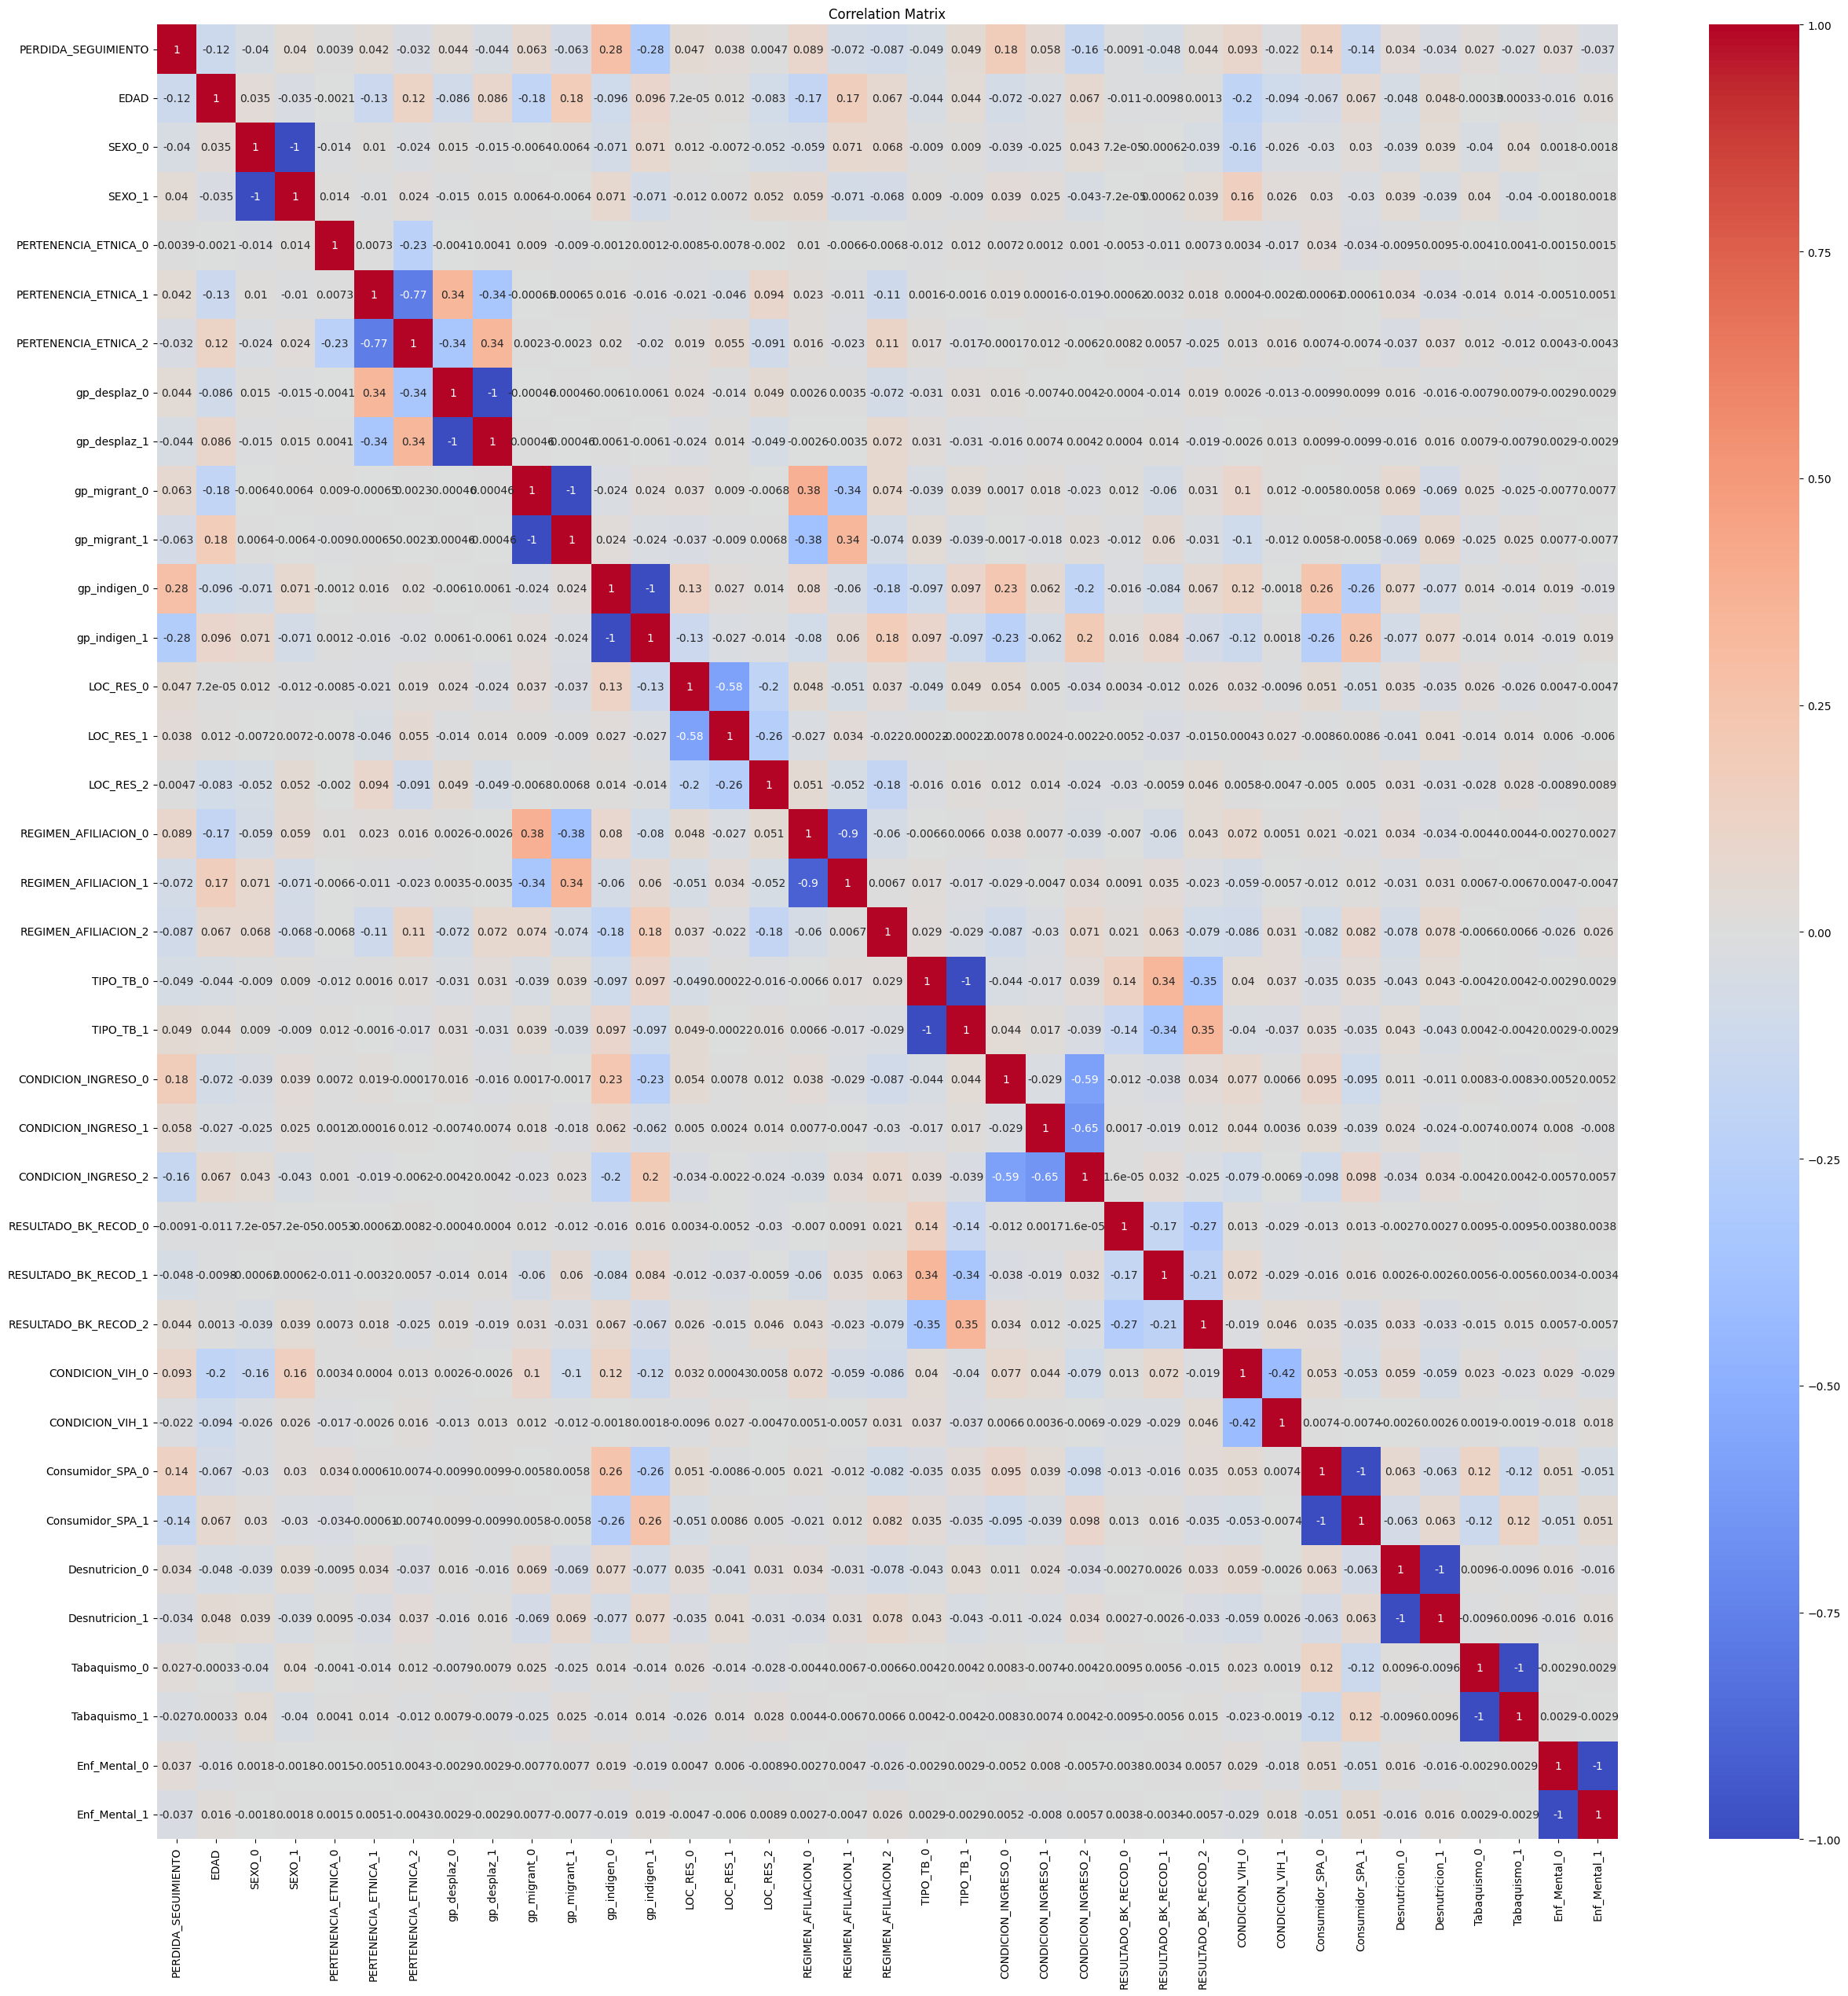

In [ ]:
# Correlation matrix
plt.figure(figsize=(30, 30))
corr_matrix = df2.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# prompt: realizar factor de inflacion de varianza al df2

# Calculate the variance inflation factor (VIF) for each feature in df2
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a new DataFrame for VIF calculation
df_vif = df2.drop('PERDIDA_SEGUIMIENTO', axis=1)  # Remove target variable

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(df_vif.columns))]

print(vif_data)

# Optional: Remove features with high VIF (e.g., VIF > 5)
high_vif_features = vif_data[vif_data.VIF > 5]['feature'].tolist()
df2 = df2.drop(columns=high_vif_features)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                 feature       VIF
0                   EDAD  1.175778
1                 SEXO_0       inf
2                 SEXO_1       inf
3   PERTENENCIA_ETNICA_0  1.156176
4   PERTENENCIA_ETNICA_1  2.733712
5   PERTENENCIA_ETNICA_2  2.944974
6           gp_desplaz_0       inf
7           gp_desplaz_1       inf
8           gp_migrant_0       inf
9           gp_migrant_1       inf
10          gp_indigen_0       inf
11          gp_indigen_1       inf
12             LOC_RES_0  2.022226
13             LOC_RES_1  2.055104
14             LOC_RES_2  1.436900
15  REGIMEN_AFILIACION_0  5.790509
16  REGIMEN_AFILIACION_1  5.570042
17  REGIMEN_AFILIACION_2  1.136470
18             TIPO_TB_0       inf
19             TIPO_TB_1       inf
20   CONDICION_INGRESO_0  2.865569
21   CONDICION_INGRESO_1  3.198516
22   CONDICION_INGRESO_2  4.901485
23  RESULTADO_BK_RECOD_0  1.170229
24  RESULTADO_BK_RECOD_1  1.258821
25  RESULTADO_BK_RECOD_2  1.261786
26       CONDICION_VIH_0  1.402507
27       CONDICION_V

In [ ]:
df2.head()

,PERDIDA_SEGUIMIENTO,EDAD,PERTENENCIA_ETNICA_0,PERTENENCIA_ETNICA_1,PERTENENCIA_ETNICA_2,LOC_RES_0,LOC_RES_1,LOC_RES_2,REGIMEN_AFILIACION_2,CONDICION_INGRESO_0,CONDICION_INGRESO_1,CONDICION_INGRESO_2,RESULTADO_BK_RECOD_0,RESULTADO_BK_RECOD_1,RESULTADO_BK_RECOD_2,CONDICION_VIH_0,CONDICION_VIH_1
0,0,-1.166737,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1
1,0,0.727154,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1
2,0,-0.566235,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1
3,0,0.773347,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1
4,0,-1.166737,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1


## **REGRESION LOGISTICA CON SUBMUESTREO**

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# Crear el modelo de regresión logística
def logistic_regression_with_ols(df, target, alpha=0.05):
    # Copia del dataframe original
    df2 = df.copy()

    # Definir la variable dependiente (objetivo) y las independientes (features)
    X = df2.drop(columns=['PERDIDA_SEGUIMIENTO'])
    y = df2['PERDIDA_SEGUIMIENTO']

    # Agregar constante para el intercepto en OLS
    X_ols = sm.add_constant(X)

    # Iterar hasta que todas las variables tengan p-value <= alpha
    while True:
        # Aplicar OLS
        ols_model = sm.OLS(y, X_ols).fit()
        p_values = ols_model.pvalues

        # Verificar si hay alguna variable con p-value mayor al umbral
        max_p_value = p_values.max()

        if max_p_value > alpha:
            # Obtener la variable con el mayor p-value
            feature_to_remove = p_values.idxmax()

            # Eliminar la característica con el p-value más alto
            if feature_to_remove == 'const':
                print("El intercepto tiene un p-valor alto, pero no lo eliminaremos.")
                break
            else:
                X_ols = X_ols.drop(columns=[feature_to_remove])
                print(f"Eliminando variable '{feature_to_remove}' con p-valor {max_p_value:.4f}")
        else:
            # Si todas las variables tienen p-value <= alpha, terminar el proceso
            break

    # Después de la selección de características, ajustar el modelo de regresión logística final
    final_features = X_ols.columns.drop('const')
    X_final = df2[final_features]

    log_reg = LogisticRegression()
    log_reg.fit(X_final, y)

    return log_reg, ols_model.summary(), final_features

# Ejemplo de uso:
# df2 es el DataFrame, y 'target_column' es el nombre de la columna objetivo.
logistic_model, ols_summary, selected_features = logistic_regression_with_ols(df2, 'PERDIDA_SEGUIMIENTO')

# Mostrar las características seleccionadas
print(f"Características finales: {selected_features}")
print(ols_summary)

Eliminando variable 'PERTENENCIA_ETNICA_2' con p-valor 0.9580
Eliminando variable 'PERTENENCIA_ETNICA_0' con p-valor 0.7453
Eliminando variable 'RESULTADO_BK_RECOD_0' con p-valor 0.5288
Eliminando variable 'CONDICION_VIH_1' con p-valor 0.2072
Eliminando variable 'CONDICION_INGRESO_1' con p-valor 0.1451
Características finales: Index(['EDAD', 'PERTENENCIA_ETNICA_1', 'LOC_RES_0', 'LOC_RES_1', 'LOC_RES_2',
       'REGIMEN_AFILIACION_2', 'CONDICION_INGRESO_0', 'CONDICION_INGRESO_2',
       'RESULTADO_BK_RECOD_1', 'RESULTADO_BK_RECOD_2', 'CONDICION_VIH_0'],
      dtype='object')
                             OLS Regression Results                            
Dep. Variable:     PERDIDA_SEGUIMIENTO   R-squared:                       0.064
Model:                             OLS   Adj. R-squared:                  0.063
Method:                  Least Squares   F-statistic:                     62.83
Date:                 Mon, 14 Oct 2024   Prob (F-statistic):          2.64e-136
Time:              

In [ ]:
selected_features

Index(['EDAD', 'PERTENENCIA_ETNICA_1', 'LOC_RES_0', 'LOC_RES_1', 'LOC_RES_2',
       'REGIMEN_AFILIACION_2', 'CONDICION_INGRESO_0', 'CONDICION_INGRESO_2',
       'RESULTADO_BK_RECOD_1', 'RESULTADO_BK_RECOD_2', 'CONDICION_VIH_0'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

X = df2[selected_features]
y = df2['PERDIDA_SEGUIMIENTO']

# Stratified split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, stratify=y_val, random_state=42)

# Printing the class distributions in the original dataset and the split sets
print("Original Class Distribution:")
print(f"Class 0: {np.sum(y == 0)}, Class 1: {np.sum(y == 1)}\n")

print("Training Set Class Distribution:")
print(f"Class 0: {np.sum(y_train == 0)}, Class 1: {np.sum(y_train == 1)}\n")

print("Validation Set Class Distribution:")
print(f"Class 0: {np.sum(y_val == 0)}, Class 1: {np.sum(y_val == 1)}\n")

print("Test Set Class Distribution:")
print(f"Class 0: {np.sum(y_test == 0)}, Class 1: {np.sum(y_test == 1)}\n")

# Create StratifiedShuffleSplit object
tratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Perform stratified splitting
# Use the correct variable name 'tratified_splitter'
for train_index, test_index in tratified_splitter.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

Original Class Distribution:
Class 0: 9364, Class 1: 738

Training Set Class Distribution:
Class 0: 5618, Class 1: 443

Validation Set Class Distribution:
Class 0: 1873, Class 1: 147

Test Set Class Distribution:
Class 0: 1873, Class 1: 148



## **REGRESION LOGISTICA CON SUBMUESTREO**

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, fbeta_score
import time


In [ ]:
# define oversampling strategy
rus = RandomUnderSampler(random_state=42)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # Assuming 5 folds; adjust as needed
random_unders_pipeline_logit = Pipeline([('rus', RandomUnderSampler(random_state=42)),
                              ('logit', LogisticRegression(random_state=16, max_iter=10000, solver="lbfgs", tol=0.01))])

In [ ]:
score1 = cross_val_score(random_unders_pipeline_logit, X_train, y_train, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score1))
print("Average Cross Validation Recall score: {}".format(score1.mean()))

Cross Validation Recall Scores are: [0.63461538 0.70588235 0.66666667 0.62745098 0.69230769 0.59615385
 0.63461538 0.63461538 0.71153846 0.78846154]
Average Cross Validation Recall score: 0.6692307692307692


In [ ]:
new_params = {
    'rus__sampling_strategy': [0.5, 0.75, 1.0],  # Different oversampling ratios
    'logit__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'logit__solver': ['lbfgs', 'liblinear'],  # Different solvers
    'logit__class_weight': ['balanced']
}

grid_under_lg = GridSearchCV(random_unders_pipeline_logit, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_under_lg.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rus',
                                        RandomUnderSampler(random_state=42)),
                                       ('logit',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=16,
                                                           tol=0.01))]),
             param_grid={'logit__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'logit__class_weight': ['balanced'],
                         'logit__solver': ['lbfgs', 'liblinear'],
                         'rus__sampling_strategy': [0.5, 0.75, 1.0]},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', grid_under_lg.best_params_)
print('Best score:', grid_under_lg.best_score_)

Best parameters: {'logit__C': 0.001, 'logit__class_weight': 'balanced', 'logit__solver': 'lbfgs', 'rus__sampling_strategy': 0.5}
Best score: 0.7253016591251885


In [ ]:
y_pred_lg = grid_under_lg.best_estimator_.named_steps['logit'].predict(X_test)

In [ ]:
cm1 = confusion_matrix(y_test, y_pred_lg)
under_lgu_Recall = recall_score(y_test, y_pred_lg)
under_lgu_Precision = precision_score(y_test, y_pred_lg)
under_lgu_f1 = f1_score(y_test, y_pred_lg)
under_lgu_accuracy = accuracy_score(y_test, y_pred_lg)
under_lgu_beta_score = fbeta_score(y_test, y_pred_lg, beta=2, average='binary')
print(cm1)

[[1626 1184]
 [  66  155]]


Text(0.5, 427.9555555555555, 'Predicted label')

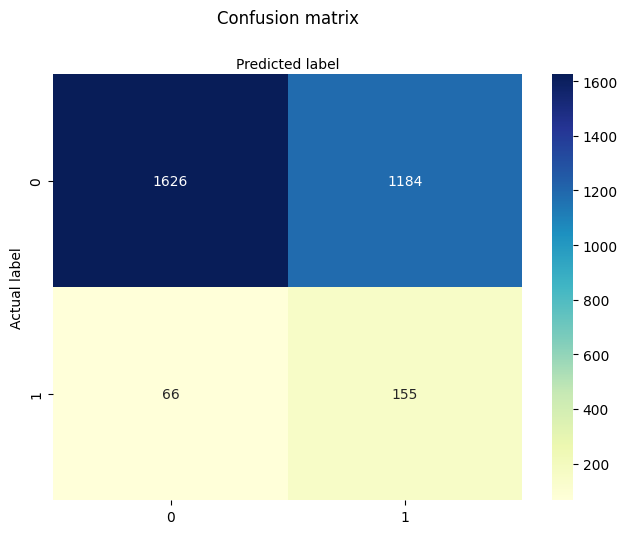

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# prompt: calcular indice kappa al modelo grid_under_lg.best_params_ comparado con varible perdida de seguimiento de df2

from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, fbeta_score

# Assuming y_test contains the true labels and y_pred_lg contains the predictions
kappa = cohen_kappa_score(y_test, y_pred_lg)

print("Cohen's Kappa:", kappa)

Cohen's Kappa: 0.08407352843765858


In [ ]:
ndf = [(under_lgu_Recall, under_lgu_Precision, under_lgu_f1, under_lgu_accuracy, under_lgu_beta_score)]
under_lgu_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'F2-score'])
under_lgu_score.insert(0, 'Logit with', 'Undersampling')
under_lgu_score

,Logit with,Recall,Precision,F1 Score,Accuracy,F2-score
0,Undersampling,0.701357,0.115758,0.198718,0.587595,0.348628


In [ ]:
time_start = time.time()
np.int = int
grid_under_lg.fit(X_train, y_train)
time_grid_under_lg  = time.time() - time_start
values_grid_under_lg  = [0.001, grid_under_lg.best_score_, time_grid_under_lg]
results_grid_under_lg  = pd.DataFrame([values_grid_under_lg], columns=['logisticregression__C', 'best_score', 'time'])
results_grid_under_lg

,logisticregression__C,best_score,time
0,0.001,0.725302,23.400813


## **XGBOOST CON SUBMUESTREO**

In [ ]:
!pip install xgboost
import xgboost as xgb

Best parameters (Undersampling): {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Best F1 score (Undersampling): 0.7563480209111277
Accuracy (Undersampled): 0.5456944902672385
Recall (Undersampled): 0.7420814479638009
Precision (Undersampled): 0.1105121293800539
F1 Score (Undersampled): 0.19237536656891496
F2 Score (Undersampled): 0.34628378378378377


Text(0.5, 427.9555555555555, 'Predicted label')

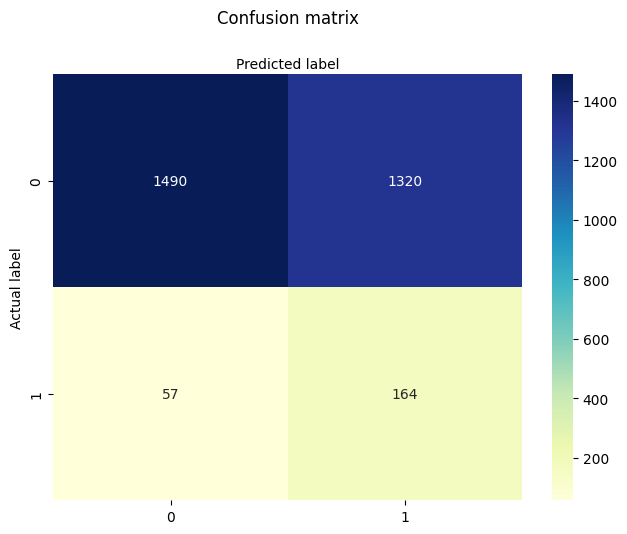

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Apply RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled_u, y_train_resampled_u = undersampler.fit_resample(X_train, y_train)

# Create an XGBoost classifier
modelXGB_u = xgb.XGBClassifier()

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create a GridSearchCV object
grid_search_u = GridSearchCV(estimator=modelXGB_u, param_grid=param_grid,
                           scoring='recall', cv=5, n_jobs=-1)

# Fit the grid search to the resampled training data
grid_search_u.fit(X_train_resampled_u, y_train_resampled_u)

# Print the best parameters and score
print("Best parameters (Undersampling):", grid_search_u.best_params_)
print("Best F1 score (Undersampling):", grid_search_u.best_score_)

# Use the best model for predictions
best_model_undersampled = grid_search_u.best_estimator_
y_pred_undersampled = best_model_undersampled.predict(X_test)

# Evaluate the best model
accuracy_undersampled = accuracy_score(y_test, y_pred_undersampled)
print(f"Accuracy (Undersampled): {accuracy_undersampled}")
recall_undersampled = recall_score(y_test, y_pred_undersampled)
print(f"Recall (Undersampled): {recall_undersampled}")
precision_undersampled = precision_score(y_test, y_pred_undersampled)
print(f"Precision (Undersampled): {precision_undersampled}")
f1_undersampled = f1_score(y_test, y_pred_undersampled)
print(f"F1 Score (Undersampled): {f1_undersampled}")
f2_undersampled = fbeta_score(y_test, y_pred_undersampled, beta=2)
print(f"F2 Score (Undersampled): {f2_undersampled}")

cm2 = confusion_matrix(y_test, y_pred_undersampled)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# prompt: calcular indice kappa al modelo best_model_undersampled comparado con varible perdida de seguimiento de df2

from sklearn.metrics import cohen_kappa_score

# Assuming y_test contains the true labels and y_pred_undersampled contains the predictions
# from the best_model_undersampled.
kappa_score = cohen_kappa_score(y_test, y_pred_undersampled)
print("Kappa Score:", kappa_score)

Kappa Score: 0.07496575188384036


In [ ]:
ndf = [(recall_undersampled, precision_undersampled, f1_undersampled, accuracy_undersampled, f2_undersampled)]

XGBoost_score_us = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy','F2-score'])
XGBoost_score_us.insert(0, 'XGBoost with ', 'Undersampling')
XGBoost_score_us

,XGBoost with,Recall,Precision,F1 Score,Accuracy,F2-score
0,Undersampling,0.742081,0.110512,0.192375,0.545694,0.346284


In [ ]:
time_start = time.time()
best_model_undersampled.fit(X_train_resampled_u, y_train_resampled_u)
time_model = time.time() - time_start
values_best_model_undersampled  = [50, grid_search_u.best_score_, time_model]
results_best_model_undersampled  = pd.DataFrame([values_best_model_undersampled], columns=['n_estimators', 'best_score', 'time'])
results_best_model_undersampled
#print(f"Training time for best_model_undersampled: {time_model:.4f} seconds")

,n_estimators,best_score,time
0,50,0.756348,0.035173


## **BOSQUES ALEATORIOS CON SUBMUESTREO**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# define oversampling strategy
rus = RandomUnderSampler(random_state=42)

In [ ]:
# fit and apply the transform
X_under, y_under = rus.fit_resample(X_train, y_train)

In [ ]:
print('No perdida:', y_under.value_counts()[0], '/', round(y_under.value_counts()[0]/len(y_under) * 100,2), '% of the dataset')
print('perdida:', y_under.value_counts()[1], '/',round(y_under.value_counts()[1]/len(y_under) * 100,2), '% of the dataset')

No perdida: 517 / 50.0 % of the dataset
perdida: 517 / 50.0 % of the dataset


In [ ]:
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier

random_under_pipeline = make_pipeline(RandomUnderSampler(random_state=42),
                              RandomForestClassifier(n_estimators=100, random_state=13))

In [ ]:
score3 = cross_val_score(random_under_pipeline, X_under, y_under, scoring='recall', cv=kf)
print("Cross Validation Recall Scores are: {}".format(score3))
print("Average Cross Validation Recall score: {}".format(score3.mean()))

Cross Validation Recall Scores are: [0.59615385 0.61538462 0.69230769 0.61538462 0.62745098 0.54901961
 0.66666667 0.5        0.67307692 0.65384615]
Average Cross Validation Recall score: 0.6189291101055807


In [ ]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_under_rf = GridSearchCV(random_under_pipeline, param_grid=new_params, cv=kf, scoring='recall',
                        return_train_score=True)
grid_under_rf.fit(X_under, y_under)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('randomundersampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [None, 10, 20],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [50, 100,
                                                                  200]},
             return_train_score=True, scoring='recall')

In [ ]:
print('Best parameters:', grid_under_rf.best_params_)
print('Best score:', grid_under_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 200}
Best score: 0.6572398190045249


In [ ]:
y_pred_under = grid_under_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

In [ ]:
cm3 = confusion_matrix(y_test, y_pred_under)

under_rf_Recall = recall_score(y_test, y_pred_under)
under_rf_Precision = precision_score(y_test, y_pred_under)
under_rf_f1 = f1_score(y_test, y_pred_under)
under_rf_accuracy = accuracy_score(y_test, y_pred_under)
under_rf_beta_score = fbeta_score(y_test, y_pred_under, beta=2, average='binary')
print(cm3)

[[1792 1018]
 [  89  132]]


Text(0.5, 427.9555555555555, 'Predicted label')

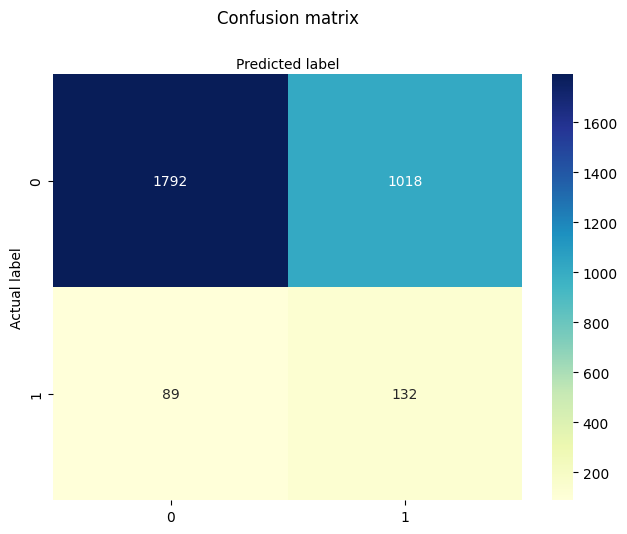

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm3), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# prompt: calcular indice kappa al modelo grid_under_rf.best_params_ comparado con df2

from sklearn.metrics import cohen_kappa_score

# Assuming y_test contains the true labels and y_pred_under contains the predictions
# from the grid_under_rf model.
kappa_score = cohen_kappa_score(y_test, y_pred_under)
print("Kappa Score:", kappa_score)
np.float64(kappa_score)

Kappa Score: 0.0800295898142166


0.0800295898142166

In [ ]:
from sklearn.metrics import cohen_kappa_score

# Assuming y_test contains the true labels and y_pred_under contains the predictions
# from the grid_under_rf model.
kappa_score = cohen_kappa_score(y_test, y_pred_under)
print("Kappa Score:", kappa_score)
np.float64(kappa_score)

Kappa Score: 0.0800295898142166


0.0800295898142166

In [ ]:
y_pred_under_series = pd.Series(y_pred_under)
value_counts = y_pred_under_series.value_counts()

print(value_counts)

0    1881
1    1150
Name: count, dtype: int64


In [ ]:
y_test.value_counts()

,count
PERDIDA_SEGUIMIENTO,
0,2810
1,221


In [ ]:
ndf = [(under_rf_Recall, under_rf_Precision, under_rf_f1, under_rf_accuracy,under_rf_beta_score )]

under_rf_score = pd.DataFrame(data = ndf, columns=['Recall','Precision','F1 Score', 'Accuracy', 'F2-score'])
under_rf_score.insert(0, 'Random Forest with', 'Undersampling')
under_rf_score

,Random Forest with,Recall,Precision,F1 Score,Accuracy,F2-score
0,Undersampling,0.597285,0.114783,0.19256,0.634774,0.324484


In [ ]:
time_start = time.time()
np.int = int
grid_under_rf.fit(X_train, y_train)
time_under_rf = time.time() - time_start
values_under_rf = [100, grid_under_rf.best_score_, time_under_rf]
results_under_rf = pd.DataFrame([values_under_rf], columns=['n_estimators', 'best_score', 'time'])
results_under_rf

,n_estimators,best_score,time
0,100,0.65954,145.449127


In [ ]:
# prompt: unificar en un dataset resultados under_lgu_score, XGBoost_score_us, under_rf_score ordenado por valor de Recall

results_df = pd.concat([under_lgu_score, XGBoost_score_us, under_rf_score], axis=0)
results_df = results_df.sort_values('Recall', ascending=False)
print(results_df)

      Logit with    Recall  Precision  F1 Score  Accuracy  F2-score  \
0            NaN  0.742081   0.110512  0.192375  0.545694  0.346284   
0  Undersampling  0.701357   0.115758  0.198718  0.587595  0.348628   
0            NaN  0.597285   0.114783  0.192560  0.634774  0.324484   

   XGBoost with  Random Forest with  
0  Undersampling                NaN  
0            NaN                NaN  
0            NaN      Undersampling  


In [ ]:
# prompt: unificar en un dataset resultados de los dataframe results_under_rf, results_best_model_undersampled y results_grid_under_lg

results_df = pd.concat([results_grid_under_lg, results_best_model_undersampled, results_under_rf], axis=0, ignore_index=True)
# Reset the index if needed
results_df = results_df.reset_index(drop=True)

# You can optionally print or save the combined dataframe
print(results_df)
# results_df.to_csv('combined_results.csv', index=False)

   logisticregression__C  best_score        time  n_estimators
0                  0.001    0.725302   23.400813           NaN
1                    NaN    0.756348    0.035173          50.0
2                    NaN    0.659540  145.449127         100.0


## **VALIDACIÓN**

In [ ]:
# prompt: Aplicar el modelo best_model_undersampled  para los set de validacion X_val, y_val

# Apply the best model to the validation set
y_pred_val = best_model_undersampled.predict(X_val)

# Evaluate the model on the validation set
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, cohen_kappa_score, fbeta_score

accuracy_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy (Validation): {accuracy_val}")
recall_val = recall_score(y_val, y_pred_val)
print(f"Recall (Validation): {recall_val}")
precision_val = precision_score(y_val, y_pred_val)
print(f"Precision (Validation): {precision_val}")
f1_val = f1_score(y_val, y_pred_val)
print(f"F1 Score (Validation): {f1_val}")
f2_val = fbeta_score(y_val, y_pred_val, beta=2)
print(f"F2 Score (Validation): {f2_val}")

# Confusion matrix
cm_val = confusion_matrix(y_val, y_pred_val)
print("Confusion Matrix (Validation):\n", cm_val)

# Cohen's Kappa
kappa_val = cohen_kappa_score(y_val, y_pred_val)
print("Kappa Score (Validation):", kappa_val)

Accuracy (Validation): 0.5450495049504951
Recall (Validation): 0.7346938775510204
Precision (Validation): 0.10931174089068826
F1 Score (Validation): 0.19030837004405288
F2 Score (Validation): 0.3426395939086294
Confusion Matrix (Validation):
 [[993 880]
 [ 39 108]]
Kappa Score (Validation): 0.07284285306168925


Text(0.5, 427.9555555555555, 'Predicted label')

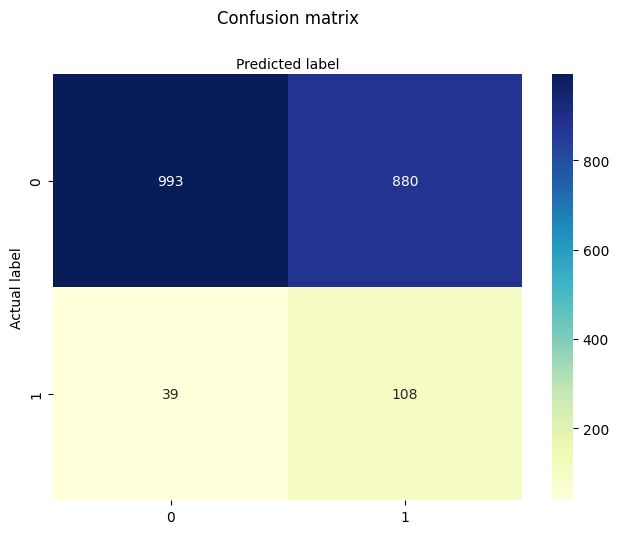

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_val), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# prompt: Aplicar el modelo grid_under_lg.best_params_ para los set de validacion X_val, y_val

# Apply the best model (from grid_under_lg) to the validation set
y_pred_val_lg = grid_under_lg.best_estimator_.named_steps['logit'].predict(X_val)

# Evaluate the model on the validation set
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score, confusion_matrix, cohen_kappa_score

accuracy_val_lg = accuracy_score(y_val, y_pred_val_lg)
print(f"Accuracy (Validation - Logit): {accuracy_val_lg}")
recall_val_lg = recall_score(y_val, y_pred_val_lg)
print(f"Recall (Validation - Logit): {recall_val_lg}")
precision_val_lg = precision_score(y_val, y_pred_val_lg)
print(f"Precision (Validation - Logit): {precision_val_lg}")
f1_val_lg = f1_score(y_val, y_pred_val_lg)
print(f"F1 Score (Validation - Logit): {f1_val_lg}")
f2_val_lg = fbeta_score(y_val, y_pred_val_lg, beta=2)
print(f"F2 Score (Validation - Logit): {f2_val_lg}")

# Confusion matrix
cm_val_lg = confusion_matrix(y_val, y_pred_val_lg)
print("Confusion Matrix (Validation - Logit):\n", cm_val_lg)

# Cohen's Kappa
kappa_val_lg = cohen_kappa_score(y_val, y_pred_val_lg)
print("Kappa Score (Validation - Logit):", kappa_val_lg)

# You can also plot the confusion matrix for the validation set if needed
# ... (similar code as for the training set)

Accuracy (Validation - Logit): 0.5871287128712871
Recall (Validation - Logit): 0.7006802721088435
Precision (Validation - Logit): 0.11534154535274356
F1 Score (Validation - Logit): 0.19807692307692307
F2 Score (Validation - Logit): 0.3477380148548278
Confusion Matrix (Validation - Logit):
 [[1083  790]
 [  44  103]]
Kappa Score (Validation - Logit): 0.08354540004721855


Text(0.5, 427.9555555555555, 'Predicted label')

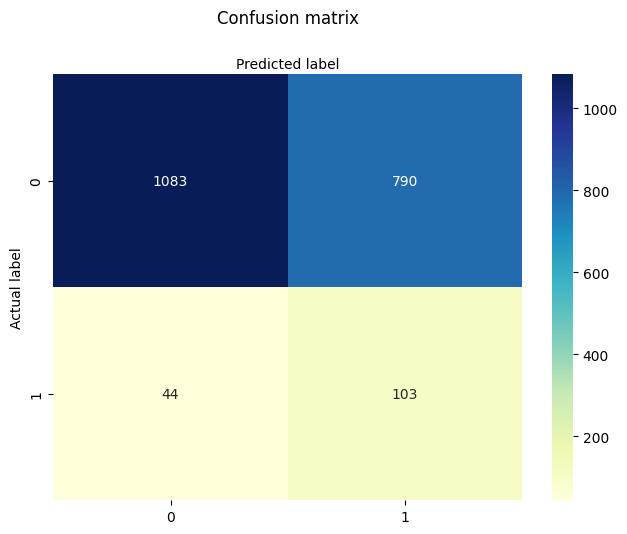

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_val_lg), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Accuracy (Validation - Random Forest): 0.6391089108910891
Recall (Validation - Random Forest): 0.6598639455782312
Precision (Validation - Random Forest): 0.125
F1 Score (Validation - Random Forest): 0.21018418201516792
F2 Score (Validation - Random Forest): 0.3555718475073314
Confusion Matrix (Validation - Random Forest):
 [[1194  679]
 [  50   97]]
Kappa Score (Validation - Random Forest): 0.10006380185734287


Text(0.5, 427.9555555555555, 'Predicted label')

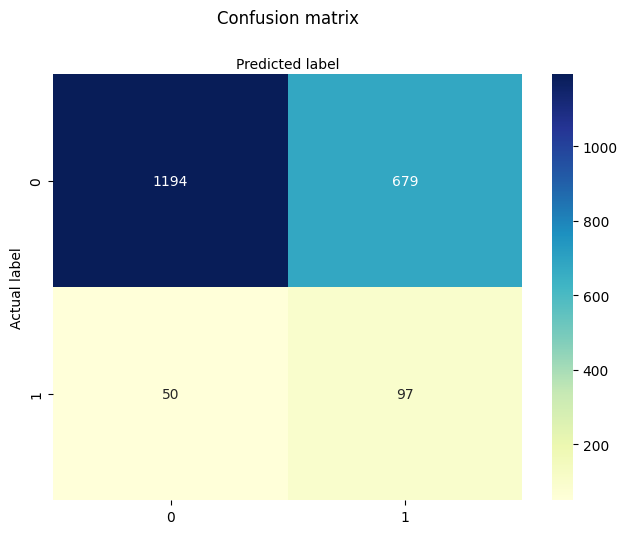

In [ ]:
# prompt: Aplicar el modelo grid_under_rf.best_params_ para los set de validacion X_val, y_val

# Apply the best model from grid_under_rf to the validation set
y_pred_val_rf = grid_under_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_val)

# Evaluate the model on the validation set
accuracy_val_rf = accuracy_score(y_val, y_pred_val_rf)
print(f"Accuracy (Validation - Random Forest): {accuracy_val_rf}")
recall_val_rf = recall_score(y_val, y_pred_val_rf)
print(f"Recall (Validation - Random Forest): {recall_val_rf}")
precision_val_rf = precision_score(y_val, y_pred_val_rf)
print(f"Precision (Validation - Random Forest): {precision_val_rf}")
f1_val_rf = f1_score(y_val, y_pred_val_rf)
print(f"F1 Score (Validation - Random Forest): {f1_val_rf}")
f2_val_rf = fbeta_score(y_val, y_pred_val_rf, beta=2)
print(f"F2 Score (Validation - Random Forest): {f2_val_rf}")

# Confusion matrix
cm_val_rf = confusion_matrix(y_val, y_pred_val_rf)
print("Confusion Matrix (Validation - Random Forest):\n", cm_val_rf)

# Cohen's Kappa
kappa_val_rf = cohen_kappa_score(y_val, y_pred_val_rf)
print("Kappa Score (Validation - Random Forest):", kappa_val_rf)

# You can also plot the confusion matrix for the validation set if needed
# ... (similar code as for the training set)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm_val_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')